In [20]:
import pandas as pd
from timeweaver import TimeWeaver

dataframe = pd.read_csv("../data/PRSA/PRSA_data_2010.1.1-2014.12.31.csv")
dataframe

# print(markdown_table=dataframe.head().to_markdown(index=False))

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


<Axes: >

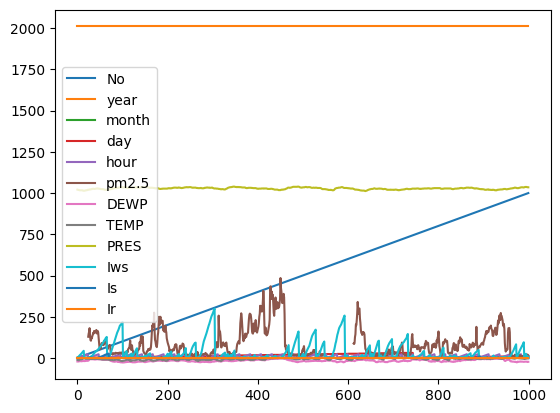

In [21]:
dataframe[0:1000].plot()

In [3]:
interpolator = TimeWeaver(dataframe[0:1000], tracking_column="No")

In [19]:
interpolator.get_summary()
# print(interpolator.get_summary().to_markdown(index=False))

,Column,Data Type,Total Numeric Cells,Total Non-Numeric Cells,Total NaNs,Total Zero Values
0,No,int64,1000,0,0,0
1,year,int64,1000,0,0,0
2,month,int64,1000,0,0,0
3,day,int64,1000,0,0,0
4,hour,int64,1000,0,0,42
5,pm2.5,float64,909,0,91,0
6,DEWP,int64,1000,0,0,0
7,TEMP,float64,1000,0,0,48
8,PRES,float64,1000,0,0,0
9,cbwd,object,0,1000,0,0


In [22]:
interpolator.get_summary(full_summary=True)
# print(interpolator.get_summary(full_summary=True).to_markdown(index=False))

| Column   | Data Type   |   Total Numeric Cells |   Total Non-Numeric Cells |   Total NaNs |   Total Zero Values |   Unique Values Count | Most Frequent Value   |   Minimum Value |   Maximum Value |      Mean |   Median |
|:---------|:------------|----------------------:|--------------------------:|-------------:|--------------------:|----------------------:|:----------------------|----------------:|----------------:|----------:|---------:|
| No       | int64       |                  1000 |                         0 |            0 |                   0 |                  1000 | 1                     |            1    |         1000    |  500.5    |   500.5  |
| year     | int64       |                  1000 |                         0 |            0 |                   0 |                     1 | 2010                  |         2010    |         2010    | 2010      |  2010    |
| month    | int64       |                  1000 |                         0 |            0 |               

In [23]:
# interpolator.get_summary_characters()
print(interpolator.get_summary_characters().to_markdown(index=False))

   Column Data Type  Total Non-Numeric  Total Numeric      n     a       .  \
0      No     int64                  0           2893    0.0   0.0     0.0   
1    year     int64                  0           4000    0.0   0.0     0.0   
2   month     int64                  0           1000    0.0   0.0     0.0   
3     day     int64                  0           1568    0.0   0.0     0.0   
4    hour     int64                  0           1580    0.0   0.0     0.0   
5   pm2.5   float64               1182           2982  182.0  91.0   909.0   
6    DEWP     int64               1000           1845    0.0   0.0     0.0   
7    TEMP   float64               1821           2246    0.0   0.0  1000.0   
8    PRES   float64               1000           5000    0.0   0.0  1000.0   
9    cbwd    object               2000              0    0.0   0.0     0.0   
10    Iws   float64               1000           3532    0.0   0.0  1000.0   
11     Is     int64                  0           1017    0.0   0

AttributeError: 'NoneType' object has no attribute 'to_markdown'

In [7]:
interpolator.evaluate()

➤ Evaluating method: spline ✔                                                   

c:\Users\richa\Desktop\TimeWeaver\.venv\Lib\site-packages\pandas\core\missing.py:604: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  terp = interpolate.UnivariateSpline(x, y, k=order, **kwargs)


➤ Evaluation complete. ✔                                                        
➤ Evaluated number of methods: 21 ✔


In [8]:
results_df = interpolator.get_evaluation_dataframe()
results_df

,linear,nearest,zero,slinear,quadratic,cubic,polynomial_order_1,polynomial_order_2,polynomial_order_3,polynomial_order_5,polynomial_order_7,polynomial_order_9,piecewise_polynomial,spline_order_1,spline_order_2,spline_order_3,spline_order_4,spline_order_5,akima,cubicspline,from_derivatives
year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month,0.000000,0.000000,0.000000,0.000000,0.000100,0.000300,0.000000,0.000100,0.000300,0.001600,0.004100,0.007600,0.000000,0.235000,0.147800,0.137200,0.115200,0.097100,0.000000,0.000300,0.000000
day,0.045000,0.070000,0.060000,0.045000,0.074100,0.086500,0.045000,0.074100,0.086500,0.156500,0.262900,0.396400,0.045000,0.382600,0.377700,0.421800,0.351500,0.355300,0.045000,0.086500,0.045000
hour,1.080000,2.540000,2.440000,1.080000,1.722700,1.897400,1.080000,1.722700,1.897400,2.653200,3.430900,4.244400,1.080000,1.407900,1.978000,1.751600,1.960000,2.524500,1.080000,1.897400,1.080000
pm2.5,10.412000,13.101100,12.348300,10.412000,10.671400,11.196400,10.412000,10.671400,11.196400,14.406100,17.812500,21.073700,10.412000,10.523300,51.163300,10.968100,nan,14.262400,9.627300,11.196400,10.412000
DEWP,0.678300,0.880000,0.860000,0.678300,0.784300,0.808100,0.678300,0.784300,0.808100,0.957400,1.101300,1.343300,0.678300,0.974600,0.907900,0.928100,0.851800,0.943200,0.713100,0.808100,0.678300
TEMP,0.720000,1.030000,1.170000,0.720000,0.851300,0.915100,0.720000,0.851300,0.915100,1.175200,1.416400,1.571000,0.720000,1.012600,1.036900,1.019800,1.129300,1.022000,0.709500,0.915100,0.720000
PRES,0.395000,0.550000,0.530000,0.395000,0.422700,0.441800,0.395000,0.422700,0.441800,0.534500,0.626500,0.734800,0.395000,0.933700,0.945600,0.837300,0.888200,0.882000,0.386500,0.441800,0.395000
cbwd,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Iws,2.972000,6.240900,5.646300,2.972000,4.337200,4.754100,2.972000,4.337200,4.754100,7.128600,10.803900,15.938900,2.972000,3.208200,4.191300,4.885500,5.705500,7.024900,2.909500,4.754100,2.972000


In [9]:
results_df = interpolator.get_method_success_dataframe()
results_df

,linear,nearest,zero,slinear,quadratic,cubic,polynomial_order_1,polynomial_order_2,polynomial_order_3,polynomial_order_5,polynomial_order_7,polynomial_order_9,piecewise_polynomial,spline_order_1,spline_order_2,spline_order_3,spline_order_4,spline_order_5,akima,cubicspline,from_derivatives
year,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
month,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
day,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
hour,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
pm2.5,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True
DEWP,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
TEMP,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
PRES,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
cbwd,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Iws,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [10]:
results_df = interpolator.get_best()
results_df

[('year', 'akima'),
 ('month', 'akima'),
 ('day', 'akima'),
 ('hour', 'akima'),
 ('pm2.5', 'akima'),
 ('DEWP', 'from_derivatives'),
 ('TEMP', 'akima'),
 ('PRES', 'akima'),
 ('Iws', 'akima'),
 ('Is', 'from_derivatives'),
 ('Ir', 'akima')]

In [12]:
interpolator.get_rate_analysis()


➤ Evaluating missing rate: 0.1 ✔


c:\Users\richa\Desktop\TimeWeaver\.venv\Lib\site-packages\pandas\core\missing.py:604: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  terp = interpolate.UnivariateSpline(x, y, k=order, **kwargs)



➤ Evaluating missing rate: 0.11 ✔

➤ Evaluating missing rate: 0.12 ✔

➤ Evaluating missing rate: 0.13 ✔

➤ Evaluating missing rate: 0.13999999999999999 ✔

➤ Evaluating missing rate: 0.14999999999999997 ✔

➤ Evaluating missing rate: 0.15999999999999998 ✔


c:\Users\richa\Desktop\TimeWeaver\.venv\Lib\site-packages\pandas\core\missing.py:604: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  terp = interpolate.UnivariateSpline(x, y, k=order, **kwargs)



➤ Evaluating missing rate: 0.16999999999999998 ✔

➤ Evaluating missing rate: 0.17999999999999997 ✔


c:\Users\richa\Desktop\TimeWeaver\.venv\Lib\site-packages\pandas\core\missing.py:604: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  terp = interpolate.UnivariateSpline(x, y, k=order, **kwargs)



➤ Evaluating missing rate: 0.18999999999999995 ✔

➤ Evaluating missing rate: 0.19999999999999996 ✔

➤ Evaluating missing rate: 0.20999999999999996 ✔

➤ Evaluating missing rate: 0.21999999999999995 ✔

➤ Evaluating missing rate: 0.22999999999999995 ✔


c:\Users\richa\Desktop\TimeWeaver\.venv\Lib\site-packages\pandas\core\missing.py:604: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  terp = interpolate.UnivariateSpline(x, y, k=order, **kwargs)



➤ Evaluating missing rate: 0.23999999999999994 ✔

➤ Evaluating missing rate: 0.24999999999999992 ✔

➤ Evaluating missing rate: 0.2599999999999999 ✔

➤ Evaluating missing rate: 0.2699999999999999 ✔

➤ Evaluating missing rate: 0.2799999999999999 ✔

➤ Evaluating missing rate: 0.2899999999999999 ✔

➤ Evaluating missing rate: 0.29999999999999993 ✔

➤ Evaluating missing rate: 0.30999999999999994 ✔

➤ Evaluating missing rate: 0.3199999999999999 ✔

➤ Evaluating missing rate: 0.32999999999999985 ✔

➤ Evaluating missing rate: 0.33999999999999986 ✔

➤ Evaluating missing rate: 0.34999999999999987 ✔

➤ Evaluating missing rate: 0.3599999999999999 ✔

➤ Evaluating missing rate: 0.3699999999999999 ✔

➤ Evaluating missing rate: 0.3799999999999999 ✔

➤ Evaluating missing rate: 0.3899999999999999 ✔

➤ Evaluating missing rate: 0.3999999999999998 ✔

➤ Evaluating missing rate: 0.4099999999999998 ✔

➤ Evaluating missing rate: 0.4199999999999998 ✔

➤ Evaluating missing rate: 0.4299999999999998 ✔

➤ Evaluating